In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from scipy import stats
from sklearn.compose import ColumnTransformer

In [2]:
train = pd.read_csv('../Data/train_clean.csv')
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,0,0,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,0,0,IR1,Lvl,...,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,0,0,Reg,Lvl,...,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,0,0,Reg,Lvl,...,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,0,0,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,138500


In [3]:
train.shape

(2051, 81)

In [4]:
train.isna().sum()

id              0
pid             0
ms_subclass     0
ms_zoning       0
lot_frontage    0
               ..
misc_val        0
mo_sold         0
yr_sold         0
sale_type       0
saleprice       0
Length: 81, dtype: int64

In [5]:
test = pd.read_csv('../Data/test_clean.csv')
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,0,Grvl,Reg,Lvl,...,0,0,0,None,None,None,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,0,0,IR1,Lvl,...,0,0,0,None,None,None,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,0,0,IR1,Lvl,...,0,0,0,None,None,None,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,0,0,Reg,Lvl,...,0,0,0,None,None,None,0,7,2007,WD
4,625,535105100,20,RL,0.0,9500,0,0,IR1,Lvl,...,0,185,0,None,None,None,0,7,2009,WD


In [6]:
test.shape

(878, 80)

In [7]:
test.isna().sum()

id              0
pid             0
ms_subclass     0
ms_zoning       0
lot_frontage    0
               ..
misc_feature    0
misc_val        0
mo_sold         0
yr_sold         0
sale_type       0
Length: 80, dtype: int64

In [8]:
xcols = ['overall_qual', 'total_bsmt_sf', '1st_flr_sf','2nd_flr_sf', 'gr_liv_area', 'garage_cars', 'garage_area',
         'neighborhood','house_style', 'exterior_1st', 'exter_qual','heating','kitchen_qual', 'garage_type', 
         'garage_finish','garage_qual', 'garage_cond','pool_qc', 'misc_feature'] 

X = train[xcols]
y = train['saleprice']

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1483)

In [10]:
print(X_train.shape ,y_train.shape)
print(X_val.shape ,y_val.shape)

(1640, 19) (1640,)
(411, 19) (411,)


In [11]:
ct = ColumnTransformer([
     ('oh', OneHotEncoder(drop='first', sparse_output=False, handle_unknown = 'ignore'), 
      ['overall_qual', 'garage_cars', 'neighborhood', 'house_style', 'exterior_1st', 
       'exter_qual', 'heating', 'kitchen_qual', 'garage_type', 'garage_qual','garage_finish', 'garage_cond', 'pool_qc', 'misc_feature'])
 ],
remainder='passthrough')

In [12]:
X_ct_train = ct.fit_transform(X_train)
X_ct_val = ct.transform(X_val)

/Users/justondea/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [13]:
test_preds = test[xcols]

In [14]:
test_ct_preds = ct.transform(test_preds)

/Users/justondea/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [15]:
lr = LinearRegression()
lr.fit(X_ct_train, y_train)

LinearRegression()

In [16]:
lr.score(X_ct_train, y_train)

0.8861981320984196

In [17]:
lr.score(X_ct_val, y_val)

0.8529491457591246

In [18]:
preds = lr.predict(test_ct_preds)

In [19]:
test['SalePrice'] = preds
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,SalePrice
0,2658,902301120,190,RM,69.0,9142,0,Grvl,Reg,Lvl,...,0,0,None,None,None,0,4,2006,WD,99214.008147
1,2718,905108090,90,RL,0.0,9662,0,0,IR1,Lvl,...,0,0,None,None,None,0,8,2006,WD,211504.659076
2,2414,528218130,60,RL,58.0,17104,0,0,IR1,Lvl,...,0,0,None,None,None,0,9,2006,New,179111.730955
3,1989,902207150,30,RM,60.0,8520,0,0,Reg,Lvl,...,0,0,None,None,None,0,7,2007,WD,103575.801939
4,625,535105100,20,RL,0.0,9500,0,0,IR1,Lvl,...,185,0,None,None,None,0,7,2009,WD,164728.917143


In [20]:
test.rename(columns={'id': 'Id'}, inplace=True)

In [21]:
submission_5 = test[['Id', 'SalePrice']].set_index('Id')

In [22]:
submission_5.head()

,SalePrice
Id,
2658,99214.008147
2718,211504.659076
2414,179111.730955
1989,103575.801939
625,164728.917143


In [23]:
submission_5.shape

(878, 1)

In [24]:
#submission_5.to_csv('juddy_submit_5.csv')

In [25]:
resids = y-test['SalePrice']

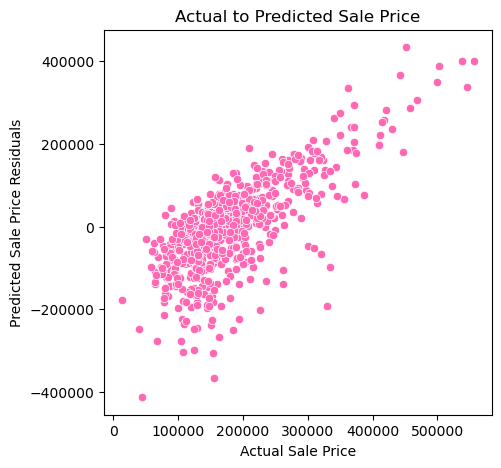

In [31]:
plt.subplots(figsize=(5,5))
sns.scatterplot(x=y_train, y=resids, color = 'hotpink')
# sns.regplot(x = y_val, y = resids, line_kws= {'color': 'black'}, scatter_kws= {'s': 5})
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price Residuals')
plt.title('Actual to Predicted Sale Price');